In [19]:
import sys

from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

In [20]:
%cd '/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'

[WinError 3] El sistema no puede encontrar la ruta especificada: "'/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'"
c:\Users\yeyer\OneDrive\Desktop\Aprendizaje maquianal practicas\AM_ArbolesDecision


C:\Users\yeyer\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [21]:
from sklearn.datasets import load_iris
from graphviz import Source
import matplotlib.pyplot as plt
from modulos.graficacion import plot_decision_regions
import pandas as pd
import numpy as np

# Árboles de decisión

Los _árboles de decisión_ son algoritmos de Aprendizaje automático capaces de realizar tareas de clasificación y regresión. El algoritmo **CART** (_Classification and Regression Tree_) es el implementado por scikit-learn para el entrenamiento de los árboles de decisión. Este produce sólo _árboles binarios_

Los árboles resultantes son monotécnicos: árboles cuyas regiones de decisión están dadas por segmentos de rectas que siempre son perpendiculares a uno de los ejes de características.

### Algoritmo
El algoritmo de crecimiento de un árbol se puede expresar de la siguiente forma:

GenerarArbol(D):

- IF $y=1$ $\forall (x,y) \in D$ o $y=0$ $\forall (x,y) \in D$:
    - return arbol
- ELSE:
    - Seleccionar la mejor característica $x_j$:
        - $D_0$ en el nodo hijo 0: $x_j = 0$ $\forall (x,y) \in D$  
        - $D_1$ en el nodo hijo 1: $x_j = 1$ $\forall (x,y) \in D$  
    - return GenerarArbol($D_0$), GenerarArbol($D_1$)

### Criterio de División
¿Cómo hago para seleccionar la mejor característica? La idea es buscar una medida en cada nodo de modo que los datos en los nodos hijos sean lo más puros posibles.

La impureza está relacionada a la cantidad de instancias que corresponden a distintas clases en el nodo. Sea $I(N)$ la impureza en el nodo N:

- $I(N)$ será 0 si todas las instancias que están presentes en el nodo pertenecen a la misma clase.
- $I(N)$ será máxima si hay igual cantidad de instancias de cada clase.


Con el algoritmo de estos clasificadores, iniciamos en la raiz del árbol y dividimos los datos teniendo en cuenta la característica que resulte en la mayor ganancia de información (IG). Mediante este proceso, continúa dividiendo cada nodo hijo hasta llegar a nodos hojas puros (es decir las muestras en estos nodos pertenecen a una sola clase), no quedan más características para continuar dividiendo o no quedan más instancias.

Esto en la práctica puede dar como resultado árboles profundos con muchos nodos, lo cual facilmente lleva al sobreajuste. Por esta razón, se suele realizar una poda (prune) para limitar la profundidad del árbol.

### Ganancia de Información (IG)

Función objetivo que se busca maximizar al dividir un nodo.

$$IG(D_p,x_j)=I(D_P)-\sum\limits_{i=1}^{m}\frac{N_i}{N_p}I(D_i)$$

$x_j$: es la característica que se usa para hacer la división

$m$: opciones posibles de la característica

$D_p$ y  $D_i$: son los conjuntos de datos del nodo padre y el *i-èsimo* nodo hijo.

$I$: es la medida de impureza.

$N_p$: es el número total de muestras de entrenamiento en el nodo padre.

$N_i$: es el número de muestras en el *i-èsimo* nodo hijo.

> La ganancia de información es sólo la diferencia entre la impureza del nodo padre y la suma de las impurezas de los nodos hijos multiplicada por un factor de normalización. A menor impureza en los nodos hijos, mayor ganancia de información.

### Entropía (impureza de entropía)

$$H(t) = -\sum\limits_{i=1}^{c}p_i log_2(p_i)$$

### Impureza de Gini

$$G(t)=1-\sum\limits_{i=1}^{c}p_i^2$$

Siendo $p_i$ la proporción de muestras que pertenecen a la clase i para un nodo particular

$c$ es el número de clases

### Ejemplo con Dataset Iris

En el siguiente gráfico, tenemos las 3 clases Setosa, Versicolor y Virginica representadas mediante 2 características.

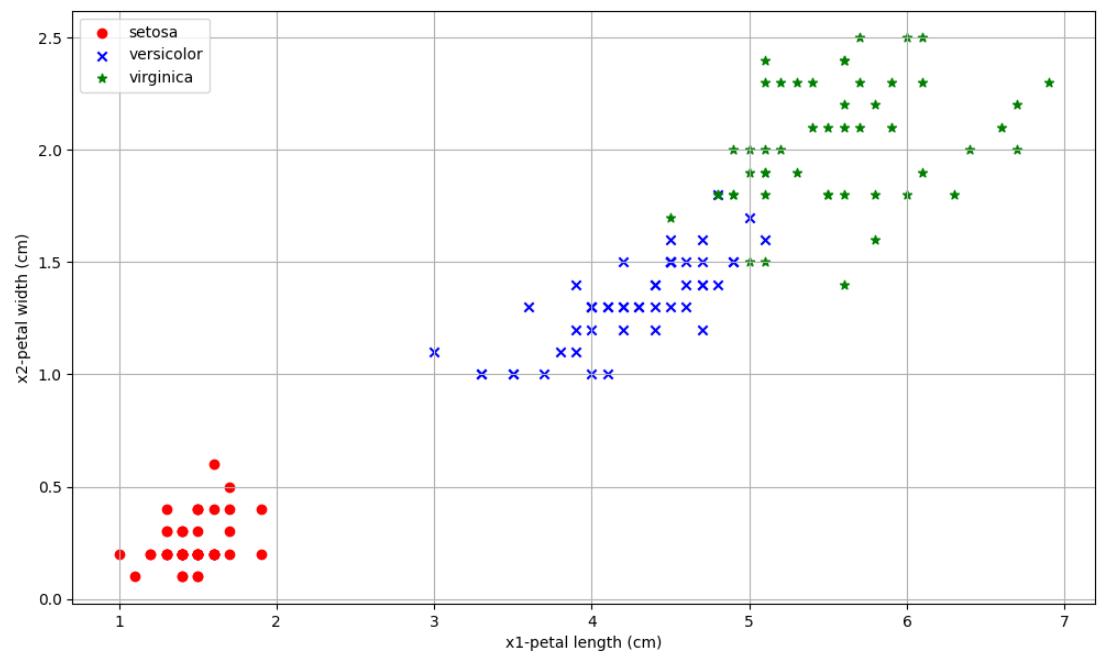

In [22]:
display(Image(filename='./2_imagenes/iris.png', width=1000))

Vamos a entrenar un árbol de decisión para separar estas 3 clases, el árbol tendrá una profundidad máxima de 2. En el siguiente enlace se encuentra la documentación de la clase [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

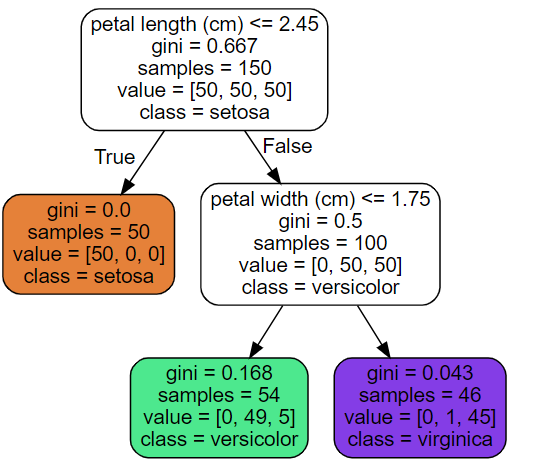

In [23]:
display(Image(filename='./2_imagenes/DT_iris_h2.png', width=500))

El árbol se puede graficar usando el método plot_tree del módulo [tree](https://scikit-learn.org/stable/api/sklearn.tree.html) de sklearn.

Alternativamente, puede usar el método [export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)

Instalador:
https://www.graphviz.org/download/

Ahora vamos a visualizar la región de decisión resultante con este árbol de decisión

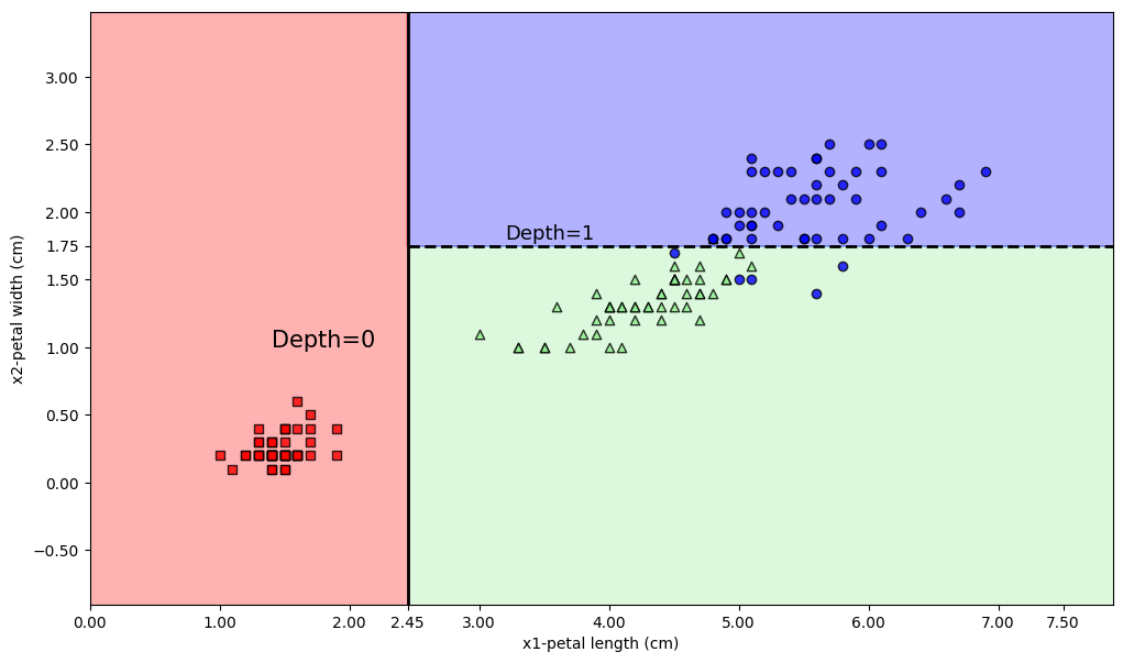

In [24]:
display(Image(filename='./2_imagenes/region_iris_h2.png', width=1000))

¿Qué sucede si limitamos la profundidad del árbol a 3?

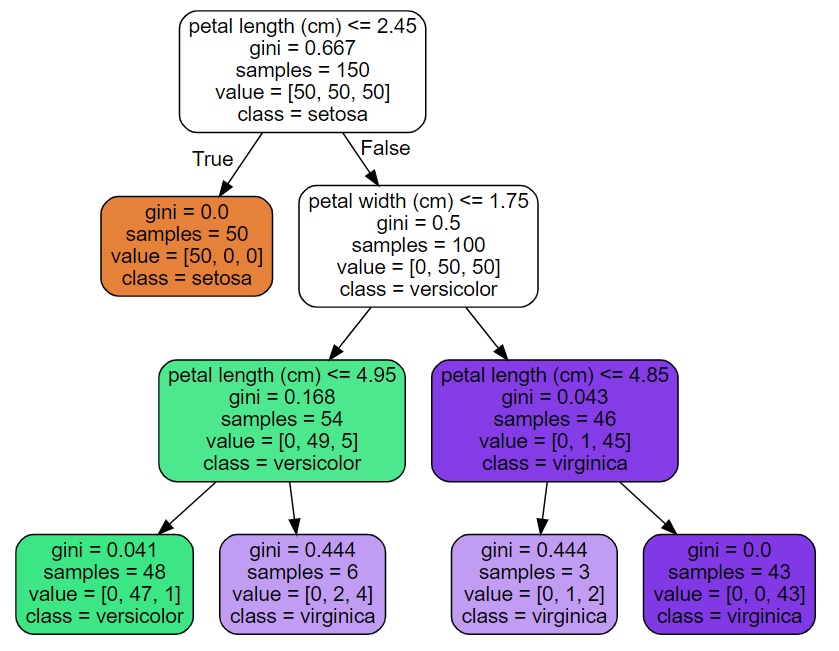

In [25]:
display(Image(filename='./2_imagenes/DT_iris_h3.png', width=700))

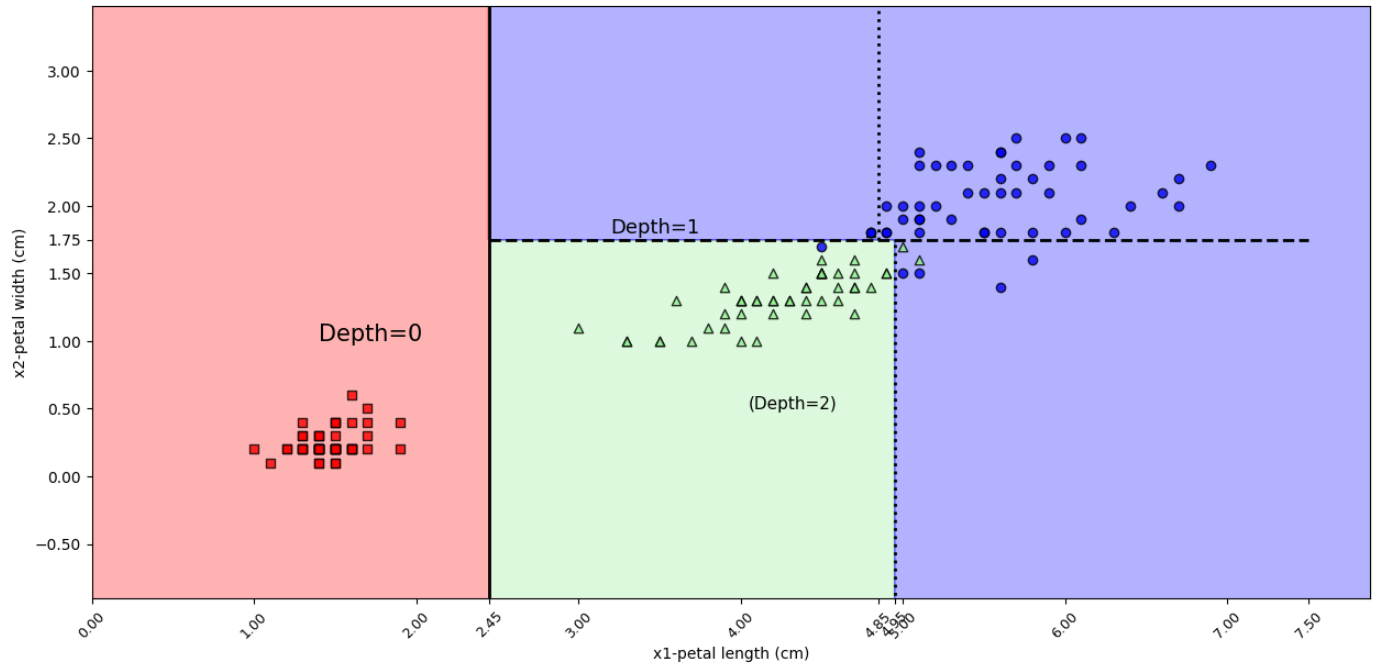

In [26]:
display(Image(filename='./2_imagenes/region_iris_h3.png', width=1300))

Para entender en profundidad como se selecciona la característica para dividir un nodo en el algoritmo. Vamos a resolver el siguiente ejemplo:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-c3ow">Edad</th>
    <th class="tg-c3ow">Le gustan los perros</th>
    <th class="tg-c3ow">Le gusta la gravedad</th>
    <th class="tg-c3ow">Será astronauta</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">&lt;40</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&lt;40</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&lt;40</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&lt;40</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0</td>
  </tr>
  <tr>
    <td class="tg-baqh">&gt;40</td>
    <td class="tg-baqh">No</td>
    <td class="tg-baqh">No</td>
    <td class="tg-baqh">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&gt;40</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&gt;40</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&gt;40</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&gt;40</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&gt;40</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">1</td>
  </tr>
</tbody>
</table>


### Ejercicio:

En la siguiente tabla se tienen datos acerca de la realización o suspensión de partidos de tenis en función del pronóstico del tiempo:


<table>
    <tbody>
        <tr>
            <td> </td>
            <td>Pronóstico</td>
            <td>Temperatura</td>
            <td>Humedad</td>
            <td>Viento</td>
            <td>Juega</td>
        </tr>
        <tr>
            <td>1</td><td>soleado</td><td>calor</td><td>alta</td><td>no</td><td>no</td>
        </tr>
        <tr>
            <td>2</td><td>soleado</td><td>calor</td><td>alta</td><td>si</td><td>no</td>
        </tr>
        <tr>
            <td>3</td><td>nublado</td><td>calor</td><td>alta</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>4</td><td>lluvioso</td><td>moderado</td><td>alta</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>5</td><td>lluvioso</td><td>frío</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>6</td><td>lluvioso</td><td>frío</td><td>normal</td><td>si</td><td>no</td>
        </tr>
        <tr>
            <td>7</td><td>nublado</td><td>frío</td><td>normal</td><td>si</td><td>si</td>
        </tr>
        <tr>
            <td>8</td><td>soleado</td><td>moderado</td><td>alta</td><td>no</td><td>no</td>
        </tr>
        <tr>
            <td>9</td><td>soleado</td><td>frío</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>10</td><td>lluvioso</td><td>moderado</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>11</td><td>soleado</td><td>moderado</td><td>normal</td><td>si</td><td>si</td>
        </tr>
        <tr>
            <td>12</td><td>nublado</td><td>moderado</td><td>alta</td><td>si</td><td>si</td>
        </tr>
        <tr>
            <td>13</td><td>nublado</td><td>calor</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>14</td><td>lluvioso</td><td>moderado</td><td>alta</td><td>si</td><td>no</td>
        </tr>
    </tbody>
</table>



1. Construya **a mano** **(haciendo todas las cuentas)** y dibuje a mano el árbol **binario** de decisión que describa los datos sobre juegos de tenis del cuadro.
Utilice la **impureza de entropía.**

2. Construya el árbol de decisión usando la clase `DecisionTreeClassifier`, para esto será necesario codificar los datos. Utilice `OneHotEncoder`. Los datos necesarios se encuentran en el archivo `play_tennis.csv`.

Compare el árbol obtenido a mano con el de scikit-learn. Son iguales?

### **PRIMER EJEMPLO**

**NIVEL 1**

In [27]:
import math

def calcular_entropia(probabilidades):
    probabilidades = [p for p in probabilidades]
    # Verifica si alguna probabilidad es 0
    """ if any(p == 0 for p in probabilidades):
        return 0 """

    # Verifica que las probabilidades sumen a 1
    if not math.isclose(sum(probabilidades), 1.0):
        raise ValueError("Las probabilidades deben sumar 1.")

    # Calcula la entropía
    entropia = -sum(p * math.log2(p) for p in probabilidades if p > 0)
    
    # Si la entropía es muy pequeña, devuélvela como 0
    if math.isclose(entropia, 0.0):
        return 0

    return entropia

def ganancia_informacion(entropia_padre, hijos):
    """
    Calcula la ganancia de información.

    :param entropia_padre: Entropía del nodo padre.
    :param hijos: Lista de tuplas donde cada tupla contiene el número de muestras y la entropía del nodo hijo.
    :return: Ganancia de información.
    """
    total_muestras = sum(n for n, _ in hijos)
    entropia_hijos = sum((n / total_muestras) * ent for n, ent in hijos)
    return entropia_padre - entropia_hijos


#NIVEL 1 
# Ejemplo del nodo padre
NodoPadre = [5/10, 5/10]
entropia_padre = calcular_entropia(NodoPadre)
print(f"Entropía del nodo padre: {entropia_padre}")

# Ejemplo de uso:
print("Entropia de perro")
PerroNo = [1/5, 4/5]
entropia_perro_no = calcular_entropia(PerroNo)
print(entropia_perro_no)
PerroSi = [4/5, 1/5]
entropia_perro_si = calcular_entropia(PerroSi)
print(entropia_perro_si)
# Calculamos la ganancia de información
hijos = [(5, entropia_perro_no), (5, entropia_perro_si)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

print("Entropia de edad")
Edadmenor40 = [2/4, 2/4]
entropiaEdadmenor40 = calcular_entropia(Edadmenor40)
print(entropiaEdadmenor40)
Edadmayor40 = [3/6, 3/6]
entropiaEdadmayor40 = calcular_entropia(Edadmayor40)
print(entropiaEdadmayor40)
hijos = [(4, entropiaEdadmenor40), (6, entropiaEdadmayor40)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

print("Entropia de Gravedad")
GravedadSI = [1/6, 5/6]
entropiaGravedadSI = calcular_entropia(GravedadSI)
print(entropiaGravedadSI)
GravedadNO = [4/4, 0/4]
entropiaGravedadNO = calcular_entropia(GravedadNO)
print(entropiaGravedadNO) 
hijos = [(6, entropiaGravedadSI), (4, entropiaGravedadNO)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

#DIVISION POR GRAVEDAD


Entropía del nodo padre: 1.0
Entropia de perro
0.7219280948873623
0.7219280948873623
Ganancia de información: 0.2780719051126377
Entropia de edad
1.0
1.0
Ganancia de información: 0.0
Entropia de Gravedad
0.6500224216483541
0
Ganancia de información: 0.6099865470109875


**NIVEL 2**

In [28]:
#NIVEL 2
# Ejemplo del nodo padre (GRAVEDAD TRUE)
entropia_padre = entropiaGravedadSI
print(f"Entropía del nodo padre: {entropia_padre}")

# Ejemplo de uso:
print("Entropia de perro")
PerroNo = [1/2, 1/2]
entropia_perro_no = calcular_entropia(PerroNo)
print(entropia_perro_no)
PerroSi = [4/4, 0/4]
entropia_perro_si = calcular_entropia(PerroSi)
print(entropia_perro_si)
# Calculamos la ganancia de información
hijos = [(2, entropia_perro_no), (4, entropia_perro_si)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

print("Entropia de edad")
Edadmenor40 = [2/2, 0/2]
entropiaEdadmenor40 = calcular_entropia(Edadmenor40)
print(entropiaEdadmenor40)
Edadmayor40 = [1/4, 3/4]
entropiaEdadmayor40 = calcular_entropia(Edadmayor40)
print(entropiaEdadmayor40)
hijos = [(2, entropiaEdadmenor40), (4, entropiaEdadmayor40)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

#DIVISION POR GRAVEDAD

Entropía del nodo padre: 0.6500224216483541
Entropia de perro
1.0
0
Ganancia de información: 0.3166890883150208
Entropia de edad
0
0.8112781244591328
Ganancia de información: 0.10917033867559889


**DIAGRAMA DE DECISION**

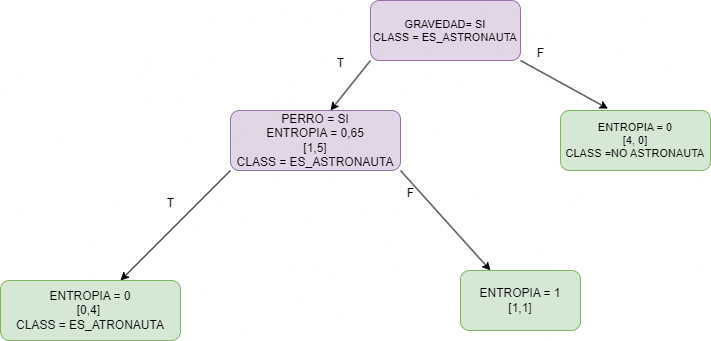

In [29]:
display(Image(filename='./2_imagenes/ejemplo1.drawio.png', width=700))


### **SEGUNDO EJEMPLO**

**NIVEL 1**

In [30]:

# Ejemplo del nodo padre
NodoPadre = [5/14, 9/14]
entropia_padre = calcular_entropia(NodoPadre)
print(f"Entropía del nodo padre: {entropia_padre}")

print("Entropia de Pronostico")
PronosticoSoleado = [3/5, 2/5]
entropia_PronosticoSoleado = calcular_entropia(PronosticoSoleado)
print(f"Entropía de Pronostico Soleado: {entropia_PronosticoSoleado}")
pronosticoLluvioso = [2/5, 3/5]
entropia_pronosticoLluvioso = calcular_entropia(pronosticoLluvioso)
print(f"Entropía de Pronostico Lluvioso: {entropia_pronosticoLluvioso}")
PronosticoNublado = [0/4, 4/4]
entropia_PronosticoNublado = calcular_entropia(PronosticoNublado)
print(f"Entropía de Pronostico Nublado: {entropia_PronosticoNublado}")
# Calculamos la ganancia de información
hijos = [(5, entropia_PronosticoSoleado), (5, entropia_pronosticoLluvioso),(4, entropia_PronosticoNublado)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

print("Entropia de Temperatura")
TemperaturaCalor = [2/4, 2/4]
entropia_TemperaturaCalor = calcular_entropia(TemperaturaCalor)
print(f"Entropía de Temperatura Calor: {entropia_TemperaturaCalor}")
TemperaturaModerado = [2/6, 4/6]
entropia_TemperaturaModerado = calcular_entropia(TemperaturaModerado)
print(f"Entropía de Temperatura Lluvioso: {entropia_TemperaturaModerado}")
TemperaturaFrio = [1/4, 3/4]
entropia_TemperaturaFrio = calcular_entropia(TemperaturaFrio)
print(f"Entropía de Temperatura Nublado: {entropia_TemperaturaFrio}")
# Calculamos la ganancia de información
hijos = [(4, entropia_TemperaturaCalor), (6, entropia_TemperaturaModerado),(4, entropia_TemperaturaFrio)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

print("Entropia de Humedad")
HumedadNormal = [1/7, 6/7]
entropia_HumedadNormal = calcular_entropia(HumedadNormal)
print(f"Entropía de Humedad No: {entropia_HumedadNormal}")
HumedadAlta = [4/7, 3/7]
entropia_HumedadAlta = calcular_entropia(HumedadAlta)
print(f"Entropía de Humedad Si: {entropia_HumedadAlta}")
# Calculamos la ganancia de información
hijos = [(7, entropia_HumedadNormal), (7, entropia_HumedadAlta)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")


print("Entropia de Viento")
VientoNO = [2/8, 6/8]
entropia_VientoNO = calcular_entropia(VientoNO)
print(f"Entropía de Viento No: {entropia_VientoNO}")
entropia_VientoSi = [3/6, 3/6]
entropia_VientoSi = calcular_entropia(entropia_VientoSi)
print(f"Entropía de Viento Si: {entropia_VientoSi}")
# Calculamos la ganancia de información
hijos = [(4, entropia_VientoNO), (6, entropia_VientoSi)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")


Entropía del nodo padre: 0.9402859586706311
Entropia de Pronostico
Entropía de Pronostico Soleado: 0.9709505944546686
Entropía de Pronostico Lluvioso: 0.9709505944546686
Entropía de Pronostico Nublado: 0
Ganancia de información: 0.24674981977443933
Entropia de Temperatura
Entropía de Temperatura Calor: 1.0
Entropía de Temperatura Lluvioso: 0.9182958340544896
Entropía de Temperatura Nublado: 0.8112781244591328
Ganancia de información: 0.02922256565895487
Entropia de Humedad
Entropía de Humedad No: 0.5916727785823275
Entropía de Humedad Si: 0.9852281360342516
Ganancia de información: 0.15183550136234159
Entropia de Viento
Entropía de Viento No: 0.8112781244591328
Entropía de Viento Si: 1.0
Ganancia de información: 0.01577470888697796


**NIVEL 2**

In [31]:
#NIVEL 2
# Ejemplo del nodo padre
NodoPadre = [5/10, 5/10]
entropia_padre = calcular_entropia(NodoPadre)
print(f"Entropía del nodo padre: {entropia_padre}")

print("Entropia de Pronostico")
PronosticoSoleado = [3/5, 2/5]
entropia_PronosticoSoleado = calcular_entropia(PronosticoSoleado)
print(f"Entropía de Pronostico Soleado: {entropia_PronosticoSoleado}")
pronosticoLluvioso = [2/5, 3/5]
entropia_pronosticoLluvioso = calcular_entropia(pronosticoLluvioso)
print(f"Entropía de Pronostico Lluvioso: {entropia_pronosticoLluvioso}")
# Calculamos la ganancia de información
hijos = [(5, entropia_PronosticoSoleado), (5, entropia_pronosticoLluvioso)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

print("Entropia de Temperatura")
TemperaturaCalor = [2/2, 0/2]
entropia_TemperaturaCalor = calcular_entropia(TemperaturaCalor)
print(f"Entropía de Temperatura Calor: {entropia_TemperaturaCalor}")
TemperaturaModerado = [2/5, 3/5]
entropia_TemperaturaModerado = calcular_entropia(TemperaturaModerado)
print(f"Entropía de Temperatura Lluvioso: {entropia_TemperaturaModerado}")
TemperaturaFrio = [1/3, 2/3]
entropia_TemperaturaFrio = calcular_entropia(TemperaturaFrio)
print(f"Entropía de Temperatura Frio: {entropia_TemperaturaFrio}")
# Calculamos la ganancia de información
hijos = [(2, entropia_TemperaturaCalor), (5, entropia_TemperaturaModerado),(3, entropia_TemperaturaFrio)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

print("Entropia de Humedad")
HumedadNormal = [1/5, 4/5]
entropia_HumedadNormal = calcular_entropia(HumedadNormal)
print(f"Entropía de Humedad No: {entropia_HumedadNormal}")
HumedadAlta = [4/5, 1/5]
entropia_HumedadAlta = calcular_entropia(HumedadAlta)
print(f"Entropía de Humedad Si: {entropia_HumedadAlta}")
# Calculamos la ganancia de información
hijos = [(5, entropia_HumedadNormal), (5, entropia_HumedadAlta)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")


print("Entropia de Viento")
VientoNO = [2/6, 4/6]
entropia_VientoNO = calcular_entropia(VientoNO)
print(f"Entropía de Viento No: {entropia_VientoNO}")
entropia_VientoSi = [3/4, 1/4]
entropia_VientoSi = calcular_entropia(entropia_VientoSi)
print(f"Entropía de Viento Si: {entropia_VientoSi}")
# Calculamos la ganancia de información
hijos = [(6, entropia_VientoNO), (4, entropia_VientoSi)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

Entropía del nodo padre: 1.0
Entropia de Pronostico
Entropía de Pronostico Soleado: 0.9709505944546686
Entropía de Pronostico Lluvioso: 0.9709505944546686
Ganancia de información: 0.02904940554533142
Entropia de Temperatura
Entropía de Temperatura Calor: 0
Entropía de Temperatura Lluvioso: 0.9709505944546686
Entropía de Temperatura Frio: 0.9182958340544896
Ganancia de información: 0.23903595255631882
Entropia de Humedad
Entropía de Humedad No: 0.7219280948873623
Entropía de Humedad Si: 0.7219280948873623
Ganancia de información: 0.2780719051126377
Entropia de Viento
Entropía de Viento No: 0.9182958340544896
Entropía de Viento Si: 0.8112781244591328
Ganancia de información: 0.12451124978365313


**NIVEL 3**

In [32]:
#NIVEL 3
# Ejemplo del nodo padre
NodoPadre = [1/5, 4/5]
entropia_padre = calcular_entropia(NodoPadre)
print(f"Entropía del nodo padre: {entropia_padre}")

print("Entropia de Pronostico")
PronosticoSoleado = [0/2, 2/2]
entropia_PronosticoSoleado = calcular_entropia(PronosticoSoleado)
print(f"Entropía de Pronostico Soleado: {entropia_PronosticoSoleado}")
pronosticoLluvioso = [1/3, 2/3]
entropia_pronosticoLluvioso = calcular_entropia(pronosticoLluvioso)
print(f"Entropía de Pronostico Lluvioso: {entropia_pronosticoLluvioso}")
# Calculamos la ganancia de información
hijos = [(2, entropia_PronosticoSoleado), (3, entropia_pronosticoLluvioso)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

print("Entropia de Temperatura")
TemperaturaModerado = [0/2, 2/2]
entropia_TemperaturaModerado = calcular_entropia(TemperaturaModerado)
print(f"Entropía de Temperatura Lluvioso: {entropia_TemperaturaModerado}")
TemperaturaFrio = [1/3, 2/3]
entropia_TemperaturaFrio = calcular_entropia(TemperaturaFrio)
print(f"Entropía de Temperatura Frio: {entropia_TemperaturaFrio}")
# Calculamos la ganancia de información
hijos = [(2, entropia_TemperaturaModerado),(3, entropia_TemperaturaFrio)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

print("Entropia de Humedad")
HumedadNormal = [1/5, 4/5]
entropia_HumedadNormal = calcular_entropia(HumedadNormal)
print(f"Entropía de Humedad Normal: {entropia_HumedadNormal}")
# Calculamos la ganancia de información
hijos = [(5, entropia_HumedadNormal)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")


print("Entropia de Viento")
VientoNO = [0/3, 3/3]
entropia_VientoNO = calcular_entropia(VientoNO)
print(f"Entropía de Viento No: {entropia_VientoNO}")
entropia_VientoSi = [1/2, 1/2]
entropia_VientoSi = calcular_entropia(entropia_VientoSi)
print(f"Entropía de Viento Si: {entropia_VientoSi}")
# Calculamos la ganancia de información
hijos = [(3, entropia_VientoNO), (2, entropia_VientoSi)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

Entropía del nodo padre: 0.7219280948873623
Entropia de Pronostico
Entropía de Pronostico Soleado: 0
Entropía de Pronostico Lluvioso: 0.9182958340544896
Ganancia de información: 0.17095059445466865
Entropia de Temperatura
Entropía de Temperatura Lluvioso: 0
Entropía de Temperatura Frio: 0.9182958340544896
Ganancia de información: 0.17095059445466865
Entropia de Humedad
Entropía de Humedad Normal: 0.7219280948873623
Ganancia de información: 0.0
Entropia de Viento
Entropía de Viento No: 0
Entropía de Viento Si: 1.0
Ganancia de información: 0.3219280948873623


In [33]:
# Ejemplo del nodo padre
NodoPadre = [4/5, 1/5]
entropia_padre = calcular_entropia(NodoPadre)
print(f"Entropía del nodo padre: {entropia_padre}")

print("Entropia de Pronostico")
PronosticoSoleado = [3/3, 0/3]
entropia_PronosticoSoleado = calcular_entropia(PronosticoSoleado)
print(f"Entropía de Pronostico Soleado: {entropia_PronosticoSoleado}")
pronosticoLluvioso = [1/2, 1/2]
entropia_pronosticoLluvioso = calcular_entropia(pronosticoLluvioso)
print(f"Entropía de Pronostico Lluvioso: {entropia_pronosticoLluvioso}")
# Calculamos la ganancia de información
hijos = [(3, entropia_PronosticoSoleado), (2, entropia_pronosticoLluvioso)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

print("Entropia de Temperatura")
TemperaturaModerado = [2/3, 1/3]
entropia_TemperaturaModerado = calcular_entropia(TemperaturaModerado)
print(f"Entropía de Temperatura Lluvioso: {entropia_TemperaturaModerado}")
TemperaturaFrio = [0/2, 2/2]
entropia_TemperaturaFrio = calcular_entropia(TemperaturaFrio)
print(f"Entropía de Temperatura Calor: {entropia_TemperaturaFrio}")
# Calculamos la ganancia de información
hijos = [(3, entropia_TemperaturaModerado),(2, entropia_TemperaturaFrio)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

print("Entropia de Humedad")
HumedadNormal = [4/5, 1/5]
entropia_HumedadNormal = calcular_entropia(HumedadNormal)
print(f"Entropía de Humedad Alta: {entropia_HumedadNormal}")
# Calculamos la ganancia de información
hijos = [(5, entropia_HumedadNormal)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")


print("Entropia de Viento")
VientoNO = [2/3, 1/3]
entropia_VientoNO = calcular_entropia(VientoNO)
print(f"Entropía de Viento No: {entropia_VientoNO}")
entropia_VientoSi = [2/2, 0/2]
entropia_VientoSi = calcular_entropia(entropia_VientoSi)
print(f"Entropía de Viento Si: {entropia_VientoSi}")
# Calculamos la ganancia de información
hijos = [(3, entropia_VientoNO), (2, entropia_VientoSi)]
ganancia = ganancia_informacion(entropia_padre, hijos)
print(f"Ganancia de información: {ganancia}")

Entropía del nodo padre: 0.7219280948873623
Entropia de Pronostico
Entropía de Pronostico Soleado: 0
Entropía de Pronostico Lluvioso: 1.0
Ganancia de información: 0.3219280948873623
Entropia de Temperatura
Entropía de Temperatura Lluvioso: 0.9182958340544896
Entropía de Temperatura Calor: 0
Ganancia de información: 0.17095059445466865
Entropia de Humedad
Entropía de Humedad Alta: 0.7219280948873623
Ganancia de información: 0.0
Entropia de Viento
Entropía de Viento No: 0.9182958340544896
Entropía de Viento Si: 0
Ganancia de información: 0.17095059445466865


**DIAGRAMA DE DECISION EJEMPLO 2**

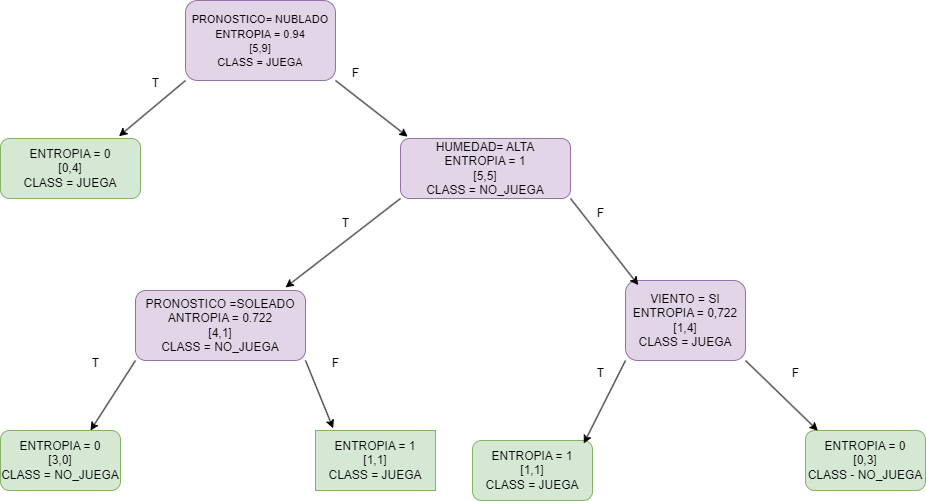

In [34]:
display(Image(filename='./2_imagenes/ejemplo2.drawio.png', width=900))


  Pronóstico Temperatura Humedad Viento Juega_Tennis
0    soleado       calor    alta     no           No
1    soleado       calor    alta     si           No
2    nublado       calor    alta     no           Si
3   lluvioso    moderado    alta     no           Si
4   lluvioso        frío  normal     no           Si


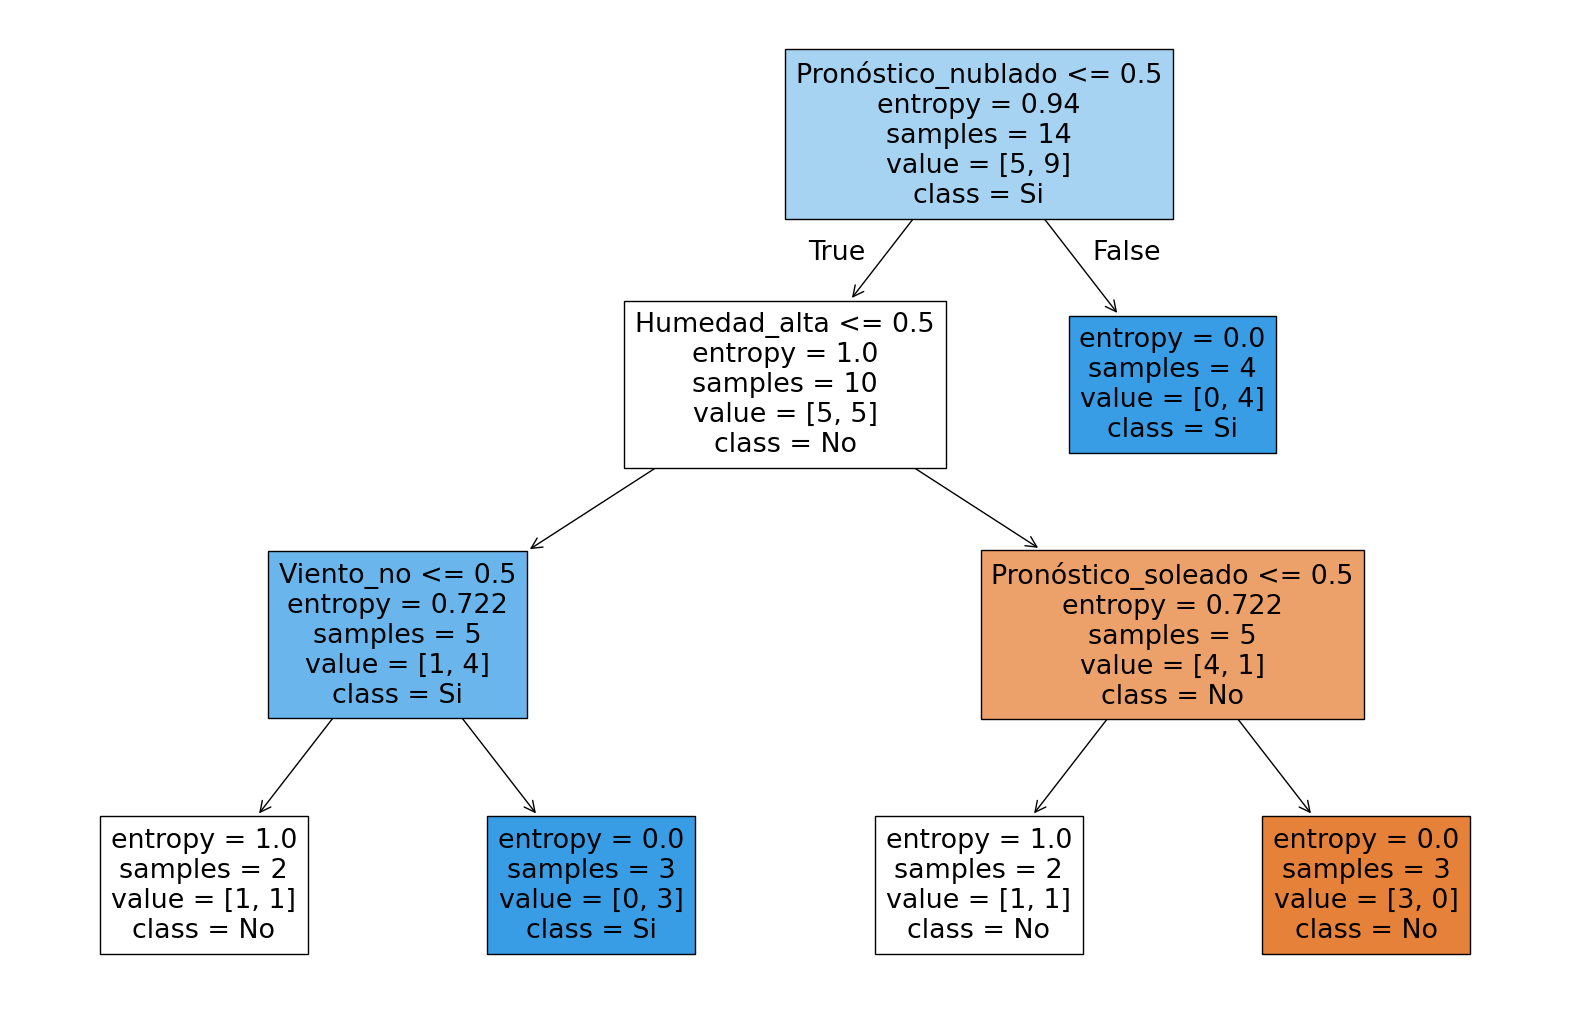

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree

# Import necessary libraries

# Load the dataset
df = pd.read_csv('./1_datos/play_tennis.csv')

# Display the first few rows of the dataframe
print(df.head())

# Separate features and target variable
X = df.drop('Juega_Tennis', axis=1)
y = df['Juega_Tennis']

# One-hot encode the categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)
# Train the DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_encoded, y)

# Display the trained decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,13))
plot_tree(clf, feature_names=encoder.get_feature_names_out(), class_names=clf.classes_, filled=True)
plt.show()

  Pronóstico Temperatura Humedad Viento Juega_Tennis
0    soleado       calor    alta     no           No
1    soleado       calor    alta     si           No
2    nublado       calor    alta     no           Si
3   lluvioso    moderado    alta     no           Si
4   lluvioso        frío  normal     no           Si


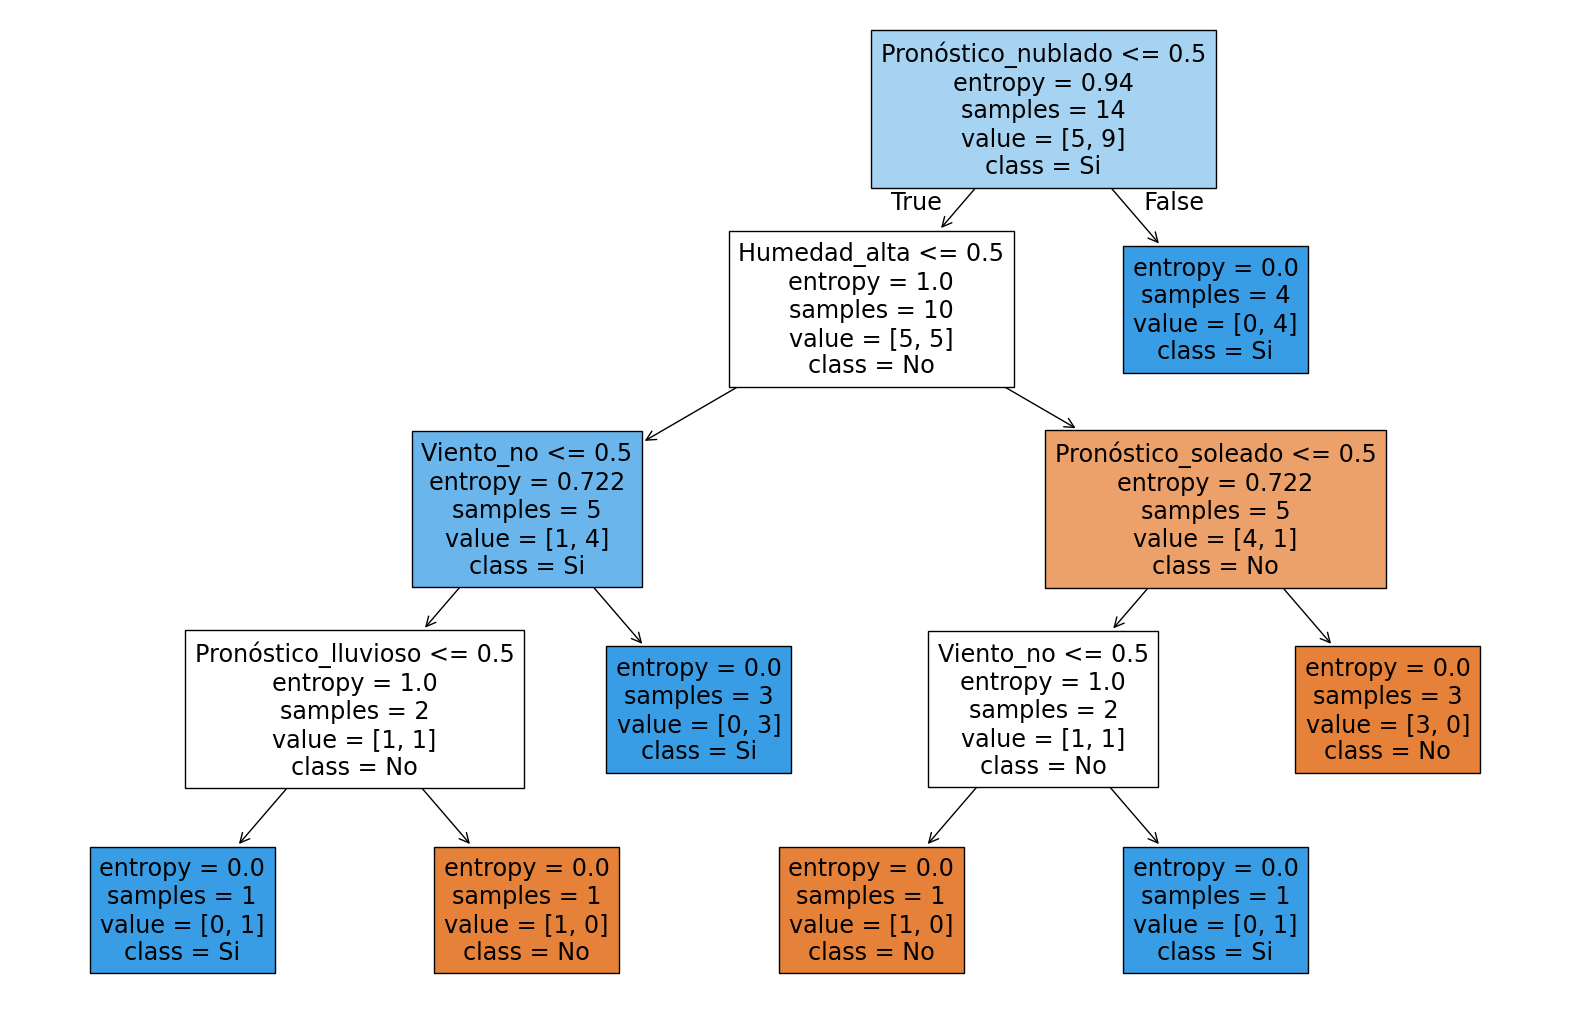

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree

# Import necessary libraries

# Load the dataset
df = pd.read_csv('./1_datos/play_tennis.csv')

# Display the first few rows of the dataframe
print(df.head())

# Separate features and target variable
X = df.drop('Juega_Tennis', axis=1)
y = df['Juega_Tennis']

# One-hot encode the categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)
# Train the DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_encoded, y)

# Display the trained decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,13))
plot_tree(clf, feature_names=encoder.get_feature_names_out(), class_names=clf.classes_, filled=True)
plt.show()